Classification Models

In [1]:
import pandas as pd #import pandas library
import numpy as np #import numpy library
import matplotlib.pyplot as plt #import Matplotlib library's "pyplot"
import seaborn as sns  #import Seaborn library
import os #import the os module (interact with operating system)

#load data into a Pandas DataFrame
data = pd.read_csv("breast-cancer.csv") #read the contents of CSV
data.head() #display the first few rows of "data"

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
del data['id'] #delete column labeled "id" from "data"
data #display "data" after the deletion

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
#assign features to X and target to y
X = data.drop(["diagnosis"], axis=1) #drops the column labeled "diagnosis" from "data"
y = data['diagnosis'] #retrieves the column labeled "diagnosis" from "data"

In [4]:
#split testing and training data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

In [5]:
#implement the model 
from sklearn.linear_model import LogisticRegression

lr =LogisticRegression() #create LogisticRegression class from scikit-learn
lr.fit(X_train, y_train) #train model using the training set
y_pred = lr.predict(X_test) #predict on the testing set based on the model

/Users/catherineko/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
#evaluate training score
lr.score(X_train, y_train)*100

95.38461538461539

In [7]:
#evaluate testing score
lr.score(X_test, y_test)*100

95.6140350877193

The accuracy score is: 95.6140350877193


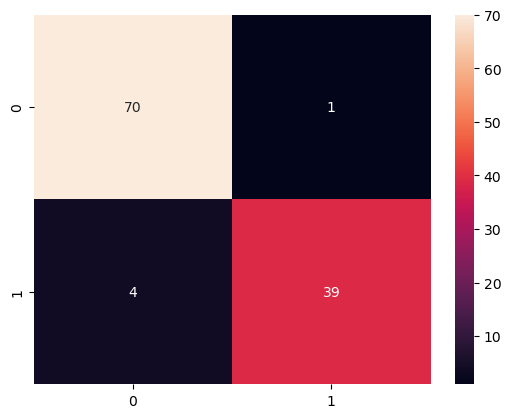

In [8]:
#output confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True) #creates a heatmap visualization of a confusion matrix

#output confusion accuracy score
from sklearn.metrics import accuracy_score

print('The accuracy score is:',accuracy_score(y_test, y_pred)*100)

Support Vector Machines (SVM)

In [9]:
#implement the model 
from sklearn.svm import SVC

svm_linear = SVC() #create SVC class from scikit-learn
svm_linear.fit(X_train, y_train) #train model using the training set
y_pred=svm_linear.predict(X_test) #predict on the testing set based on the model

In [10]:
#evaluate training score
svm_linear.score(X_train, y_train)*100

91.42857142857143

In [11]:
#evaluate testing score
svm_linear.score(X_test, y_test)*100

94.73684210526315

The accuracy score is: 94.73684210526315


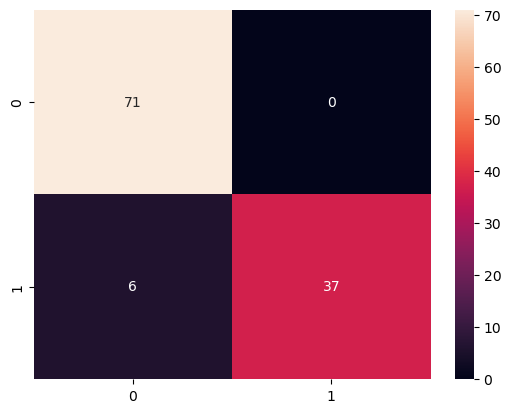

In [12]:
#output confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True) #creates a heatmap visualization of a confusion matrix

#output confusion accuracy score
from sklearn.metrics import accuracy_score

print('The accuracy score is:',accuracy_score(y_test, y_pred)*100)

Adaboost

In [13]:
#implement the model 
from sklearn.ensemble import AdaBoostClassifier

adab = AdaBoostClassifier() #creates class to fit the classification model
adab.fit(X_train, y_train) #train model using the training set
y_pred=adab.predict(X_test) #predict on the testing set based on the model

#svm_poly = SVC(kernel='poly', degree=2) #specifies the degree of the polynomial kernel function


In [14]:
#evaluate training score
adab.score(X_train, y_train)*100

100.0

In [15]:
#evaluate testing score
adab.score(X_test, y_test)*100

97.36842105263158

The accuracy score is: 97.36842105263158


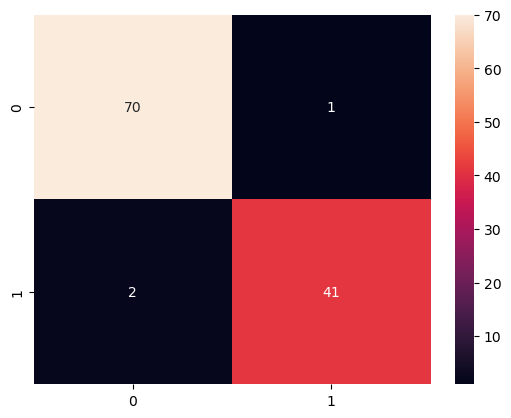

In [16]:
#output confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True) #creates a heatmap visualization of a confusion matrix

#output confusion accuracy score
from sklearn.metrics import accuracy_score

print('The accuracy score is:',accuracy_score(y_test, y_pred)*100)